<a href="https://colab.research.google.com/github/KritikaSati/Forecasting-Model/blob/main/ForecastingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing xlrd version 1.2.0

In [ ]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 6.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


#Importing warnings, packages like: numpy, pandas, matplotlib

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

#Importing DataSet and Printing it

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
df = pd.read_excel('gdrive/My Drive/SuperstoreData.xls')
print(df.head())

Mounted at /content/gdrive
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0    

#Data Pre-Processing i.e Data Cleaning and Indexing

In [ ]:
Technology = df.loc[df['Category'] == 'Technology']
Technology['Order Date'].min(), Technology['Order Date'].max()
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
Technology.drop(cols, axis=1, inplace=True)
Technology = Technology.sort_values('Order Date')
Technology.isnull().sum()
Technology = Technology.groupby('Order Date')['Sales'].sum().reset_index()
Technology = Technology.set_index('Order Date')
Technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

#Data Visualization
Data taken from 2016 onwards for analysis

Order Date
2016-01-01     374.671067
2016-02-01    1225.891400
2016-03-01    1135.150105
2016-04-01     875.911882
2016-05-01    1601.816167
2016-06-01    1023.259500
2016-07-01     829.312500
2016-08-01     483.620100
2016-09-01    1144.170300
2016-10-01    1970.835875
2016-11-01    1085.642360
2016-12-01     970.554870
2017-01-01    1195.218071
2017-02-01     430.501714
2017-03-01    1392.859250
2017-04-01     825.559133
2017-05-01     678.329400
2017-06-01     853.055000
2017-07-01    1054.996636
2017-08-01     978.842333
2017-09-01    1077.704120
2017-10-01    1493.439227
2017-11-01    1996.750920
2017-12-01     955.865652
Freq: MS, Name: Sales, dtype: float64


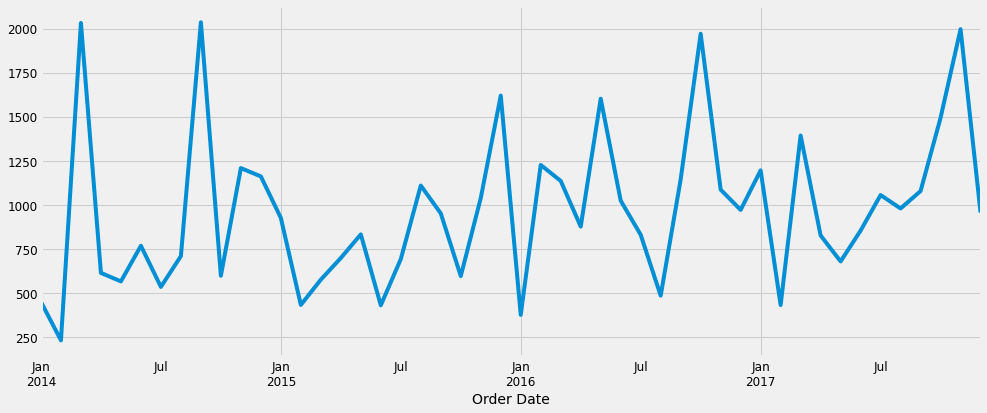

In [ ]:
y = Technology['Sales'].resample('MS').mean()
print(y['2016': ])
y.plot(figsize=(15,6))
plt.show()

#Importing the Parameters and display pattern

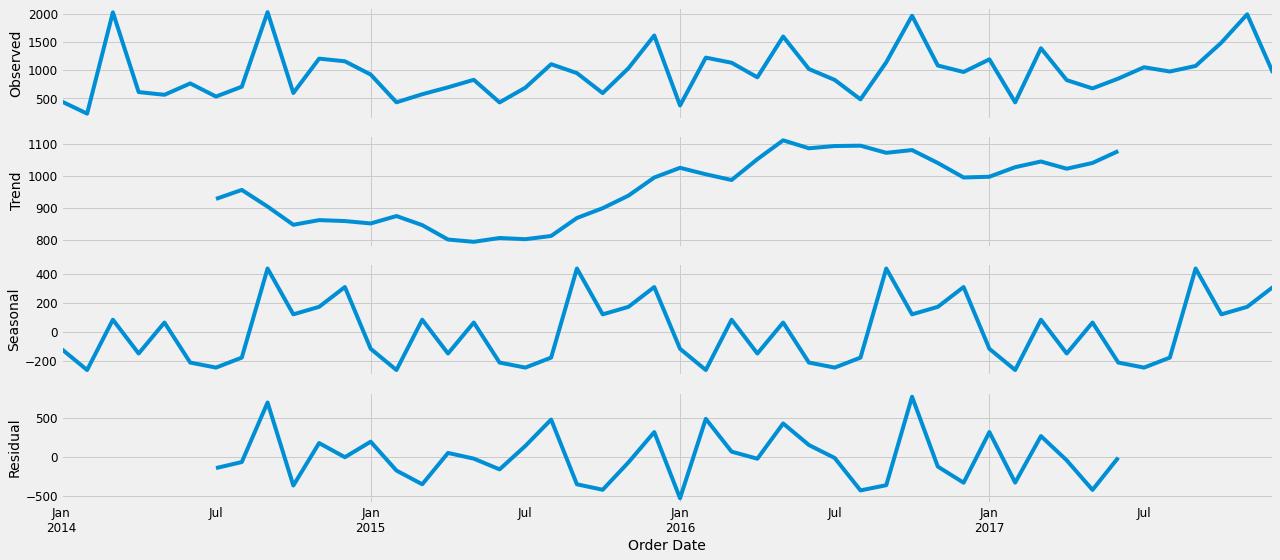

In [ ]:
from pylab import rcParams  #parameters are imported 
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')  #statistical model (sm used)
fig = decomposition.plot()
plt.show()

After observing, we can say that the graph showing us the seasonal ARIMA model since the pattern in the graph is increasing only in a particular time of month

#Time Series Forecasting with SARIMA



Checking the Stationarity of the Dataset

#Parametric Test

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
print('Example of parameter combinations for seasonal ARIMA')
print('SARIMA: {} x {}' .format(pdq[1], seasonal_pdq[1]))
print('SARIMA: {} x {}' .format(pdq[1], seasonal_pdq[2]))
print('SARIMA: {} x {}' .format(pdq[2], seasonal_pdq[3]))
print('SARIMA: {} x {}' .format(pdq[2], seasonal_pdq[4]))

Example of parameter combinations for seasonal ARIMA
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


#Fitting the ARIMA model and Running model diagonistic to check the unsual behaviour 

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:791.4891765009955
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1368.1106630794795
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:549.0156237882129
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:564.1031529698099


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1442.7120926416446
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:372.6612068172691
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:750.8969484750883
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2796.403001226545
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:535.0489454747286
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:566.082790402832
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3206.3651665190373


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:373.8760065868672
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:729.3478530285049
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1396.1093533465018
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:562.7585881681283
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:543.3082156228088


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1443.3173647704161
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:377.03544814349607
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:675.959989748357
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2794.091929725341
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:517.5329284811307
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:526.5542322434092
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3261.2384638267235
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:359.52308427544375
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:742.0250351345342


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1740.380463368828
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:550.272134077019
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:543.2786122758223


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1298.6159947763601
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:359.37687065897086
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:699.8975570622575
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2737.867096048284
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:536.899575110411
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:527.7942232886104
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:26368837.230842054
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:361.31492579749664
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:717.9677328156988


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1581.3482166521312
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:555.4581770800665
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:522.5042506796542


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1556.6045751260772
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:355.1259547276067
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:677.6306925349004
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2658.4564074444556
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:518.7903710454138
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:513.1256895923921
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2684.2499847609856
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:343.603733597345
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2660      0.249     -1.067      0.286      -0.755       0.223
ma.L1         -1.0001      0.348     -2.870      0.004      -1.683      -0.317
ar.S.L12      -0.5003      0.175     -2.852      0.004      -0.844      -0.157
sigma2      2.243e+05   1.55e-06   1.44e+11      0.000    2.24e+05    2.24e+05


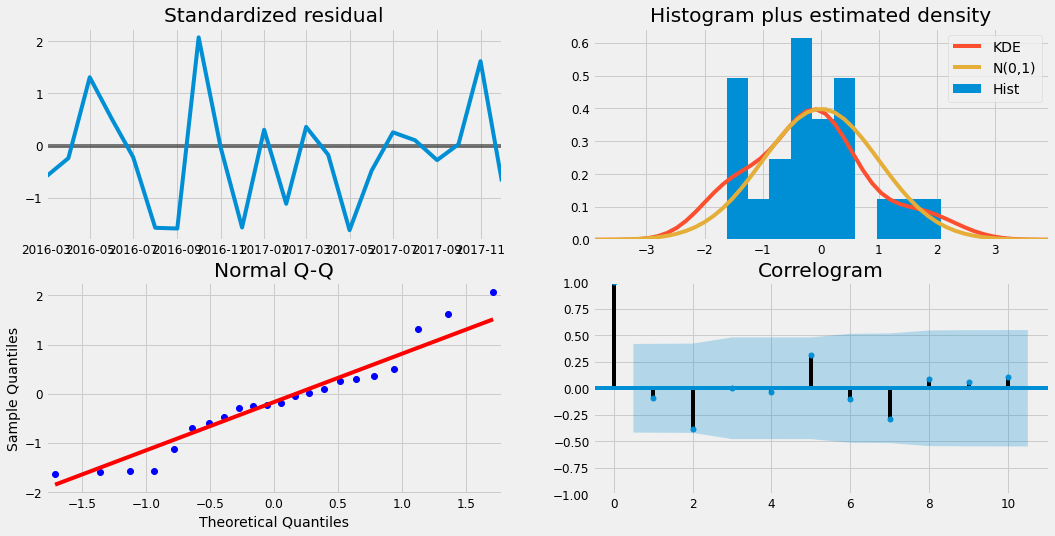

In [ ]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(y, order= param, seasonal_order = param_seasonal, enforce_stationarity = False, enforce_invertibility = False)
      results = mod.fit()
      print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal, results.aic))
    except:
        continue
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order = (1,1,0,12), enforce_stationarity = False, enforce_invertibility = False)
result = mod.fit()
print(results.summary().tables[1] )
results.plot_diagnostics(figsize=(16,8))
plt.show()

Since, Looking at Autocorrelation Function (ACF) plot
i.e the correlation of a signal with a lag. 

If we see the **Correlogram Plot** then, the values tend to degrade to zero quickly, so `**our model is a stationary time series**` 

#Prediction for the particular value i.e for the Technology Sales

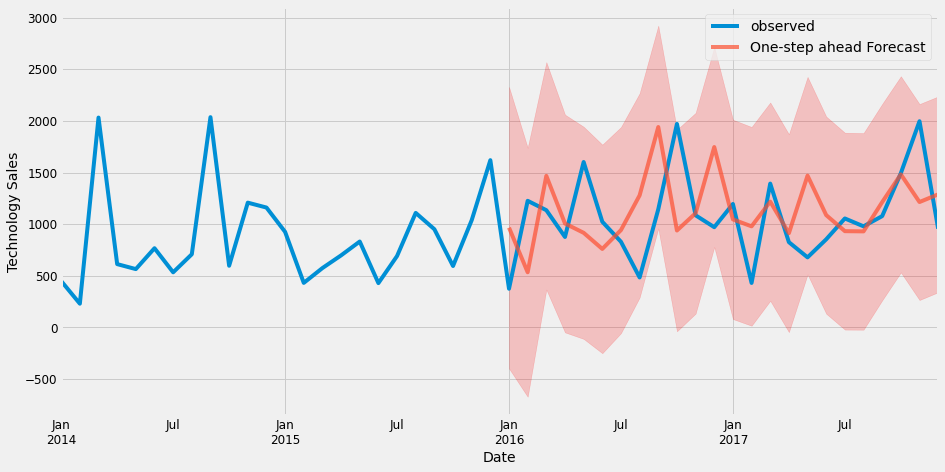

In [ ]:
pred = results.get_prediction(start = pd.to_datetime('2016-01-01'), dynamic = False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax= ax, label = 'One-step ahead Forecast', alpha =.7, figsize =(14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'r', alpha = .2)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()

#Validating the Forecast by Calculating the MSE and RMSE of our forecast

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))
print('The Root Mean Squared Error of out forecasts is {}'.format(round(np.sqrt(mse),2)))

The Mean Squared Error of our forecasts is 260170.95
The Root Mean Squared Error of out forecasts is 510.07


#Producing and Visualizing the Forecast

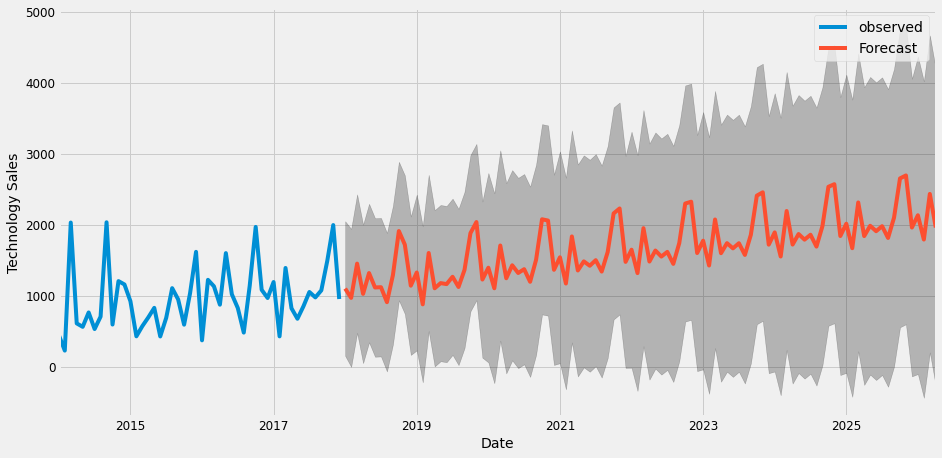

In [ ]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label = 'observed', figsize = (14,7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()

#1-
#Comparing two categories i.e Time series of Technology and Office Supplies and Data Exploration



In [ ]:
technology = df.loc[df['Category'] == 'Technology']
office = df.loc[df['Category'] == 'Office Supplies']
technology.shape, office.shape
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis = 1, inplace = True )
office.drop(cols, axis = 1, inplace = True)
technology = technology.sort_values('Order Date')
office = office.sort_values('Order Date')
technology = technology.groupby('Order Date') ['Sales'].sum().reset_index()
office = office.groupby('Order Date') ['Sales'].sum().reset_index()
technology = technology.set_index('Order Date')
office = office.set_index('Order Date')
y_technology = technology['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
technology = pd.DataFrame({'Order Date': y_technology.index, 'Sales' : y_technology.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales' : y_office.values})
#inner merging the technology and office supplies
store = technology.merge(office, how = 'inner', on = 'Order Date')
store.rename(columns = {'Sales_x': 'technology_sales', 'Sales_y': 'office_sales'}, inplace = True)
store.head()

,Order Date,technology_sales,office_sales
0,2014-01-01,449.041429,285.357647
1,2014-02-01,229.787143,63.042588
2,2014-03-01,2031.948375,391.176318
3,2014-04-01,613.028933,464.794750
4,2014-05-01,564.698588,324.346545


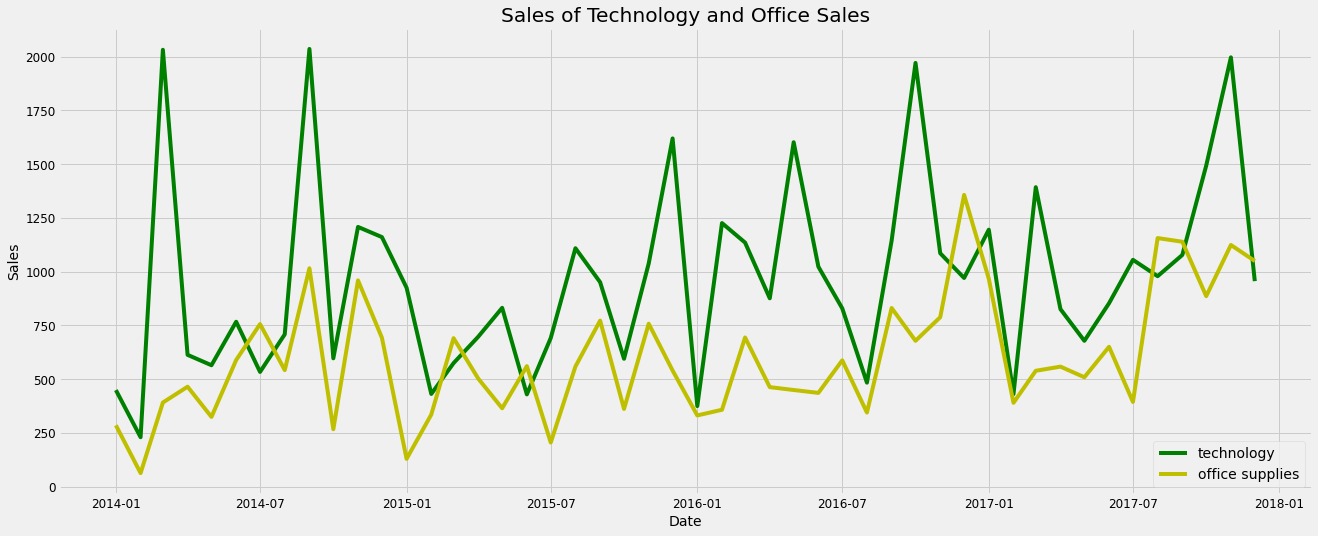

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'], store['technology_sales'], 'g-', label = 'technology')
plt.plot(store['Order Date'], store['office_sales'], 'y-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Technology and Office Sales')
plt.legend()

#Time series Modelling by Prophet

Installing Prophet package and renaming to develop forecasting system

In [ ]:
from fbprophet import Prophet
technology = technology.rename(columns = {'Order Date' : 'ds', 'Sales': 'y'})
technology_model = Prophet(interval_width = 0.95)
technology_model.fit(technology)
office = office.rename(columns = {'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width = 0.95)
office_model.fit(office)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Making Future Data Frames and predicting the profit Sales of Technology

<Figure size 1296x432 with 0 Axes>

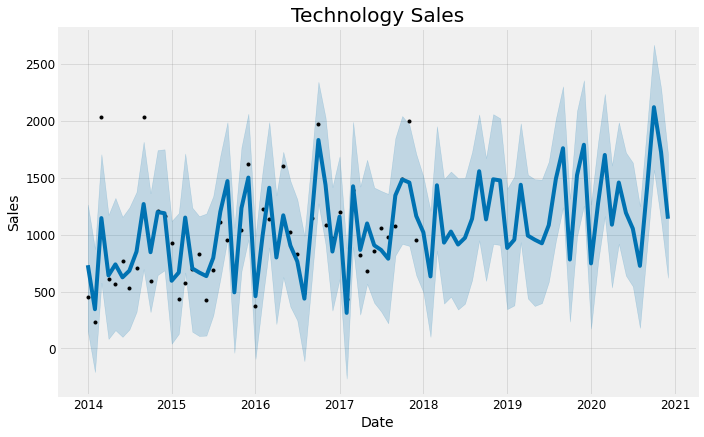

In [ ]:
technology_forecast = technology_model.make_future_dataframe(periods = 36, freq = 'MS')
technology_forecast = technology_model.predict(technology_forecast)
office_forecast = office_model.make_future_dataframe(periods = 36, freq = 'MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize = (18,6))
technology_model.plot(technology_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Technology Sales');

#2 -
#Comparing two categories i.e Time series of Furniture and Technology 
#and Data Exploration

In [ ]:
technology = df.loc[df['Category'] == 'Technology']
furniture = df.loc[df['Category'] == 'Furniture']
technology.shape, furniture.shape
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis = 1, inplace = True )
furniture.drop(cols, axis = 1, inplace = True)
technology = technology.sort_values('Order Date')
furniture = furniture.sort_values('Order Date')
technology = technology.groupby('Order Date') ['Sales'].sum().reset_index()
furniture = furniture.groupby('Order Date') ['Sales'].sum().reset_index()
technology = technology.set_index('Order Date')
furniture = furniture.set_index('Order Date')
y_technology = technology['Sales'].resample('MS').mean()
y_furniture = furniture['Sales'].resample('MS').mean()
technology = pd.DataFrame({'Order Date': y_technology.index, 'Sales' : y_technology.values})
furniture = pd.DataFrame({'Order Date': y_furniture.index, 'Sales' : y_furniture.values})
#inner merging the technology and furniture supplies
store = technology.merge(furniture, how = 'inner', on = 'Order Date')
store.rename(columns = {'Sales_x': 'technology_sales', 'Sales_y': 'furniture_sales'}, inplace = True)
store.head()

,Order Date,technology_sales,furniture_sales
0,2014-01-01,449.041429,480.194231
1,2014-02-01,229.787143,367.931600
2,2014-03-01,2031.948375,857.291529
3,2014-04-01,613.028933,567.488357
4,2014-05-01,564.698588,432.049188


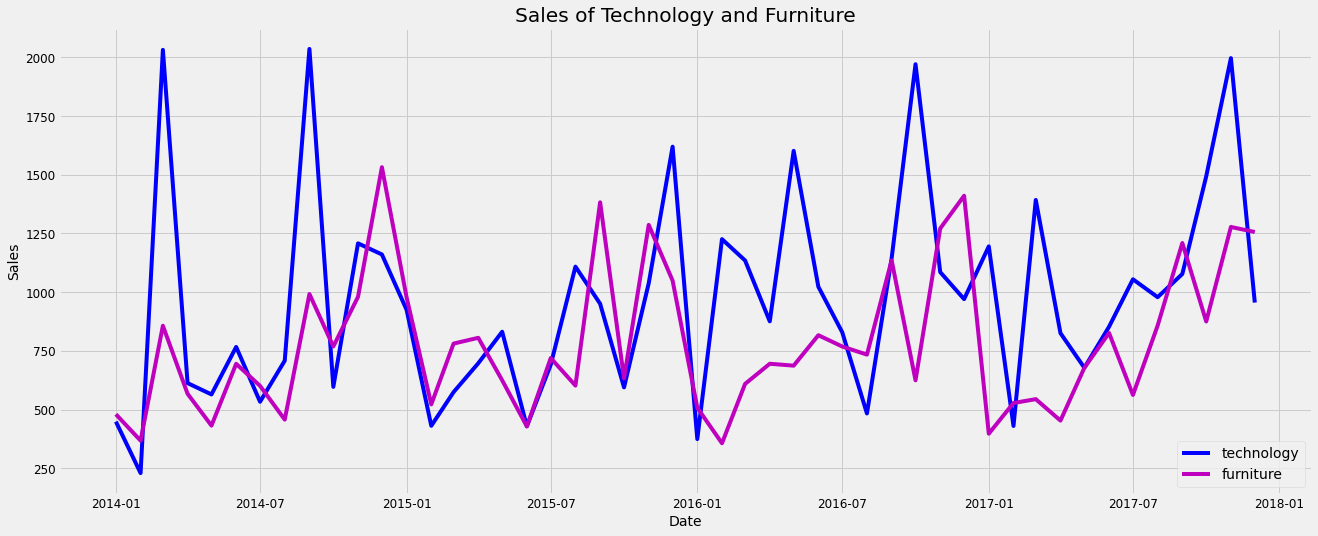

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'], store['technology_sales'], 'b-', label = 'technology')
plt.plot(store['Order Date'], store['furniture_sales'], 'm-', label = 'furniture')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Technology and Furniture')
plt.legend()

#Time series Modelling by Prophet

Installing Prophet package and renaming to develop forecasting system

In [ ]:
from fbprophet import Prophet
technology = technology.rename(columns = {'Order Date' : 'ds', 'Sales': 'y'})
technology_model = Prophet(interval_width = 0.95)
technology_model.fit(technology)
furniture = furniture.rename(columns = {'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width = 0.95)
furniture_model.fit(furniture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Making Future Data Frames and predicting the profit Sales of Furniture

<Figure size 1296x432 with 0 Axes>

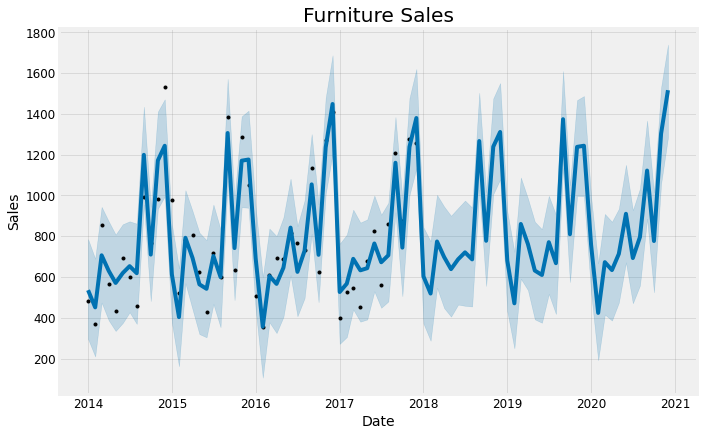

In [ ]:
technology_forecast = technology_model.make_future_dataframe(periods = 36, freq = 'MS')
technology_forecast = technology_model.predict(technology_forecast)
furniture_forecast = furniture_model.make_future_dataframe(periods = 36, freq = 'MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
plt.figure(figsize = (18,6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

#3 -
#Comparing two categories i.e Time series of Furniture and Office supplies 
#and Data Exploration

In [ ]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True )
office.drop(cols, axis = 1, inplace = True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date') ['Sales'].sum().reset_index()
office = office.groupby('Order Date') ['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date': y_furniture.index, 'Sales' : y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales' : y_office.values})
#inner merging the furniture and office supplies
store = furniture.merge(office, how = 'inner', on = 'Order Date')
store.rename(columns = {'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace = True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


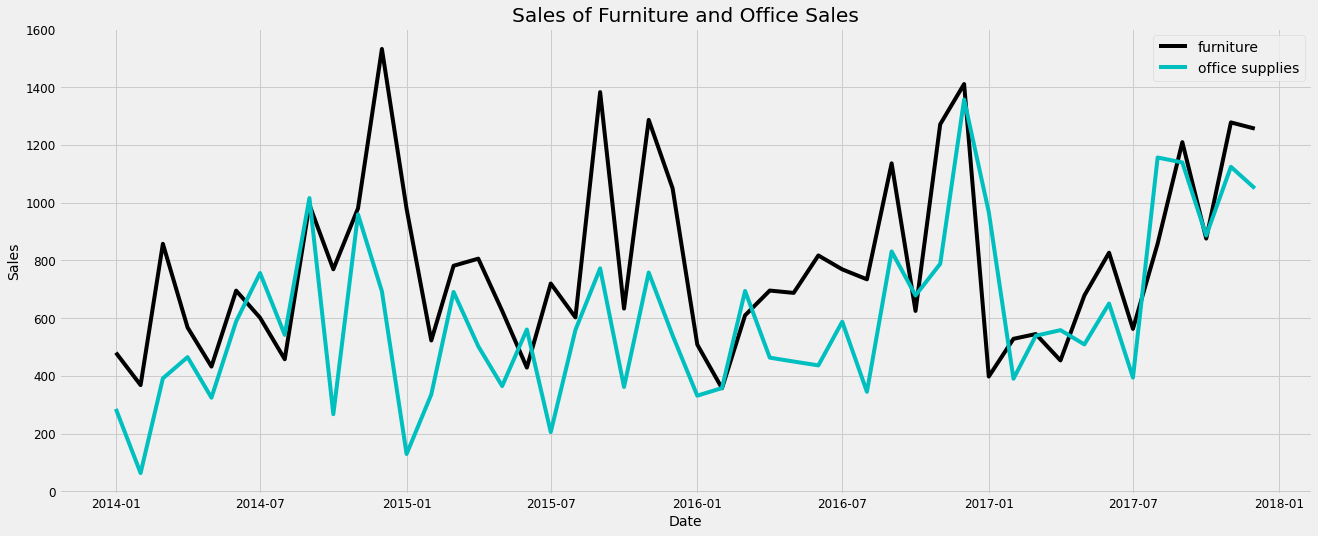

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'], store['furniture_sales'], 'k-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'c-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Sales')
plt.legend()

#Time series Modelling by Prophet

Installing Prophet package and renaming to develop forecasting system

In [ ]:
from fbprophet import Prophet
furniture = furniture.rename(columns = {'Order Date' : 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width = 0.95)
furniture_model.fit(furniture)
office = office.rename(columns = {'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width = 0.95)
office_model.fit(office)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Making Future Data Frames and predicting the profit Sales of 
office

<Figure size 1296x432 with 0 Axes>

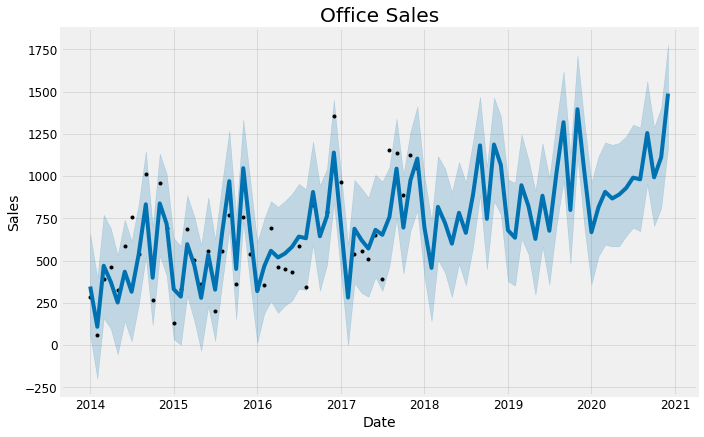

In [ ]:
furniture_forecast = furniture_model.make_future_dataframe(periods = 36, freq = 'MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods = 36, freq = 'MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize = (18,6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Sales');